# WINE QUALITY PREDICTION

# .......
### Project By :-
#### PRABHAT MALHAN
#### B.Tech(CSE)
#### GRAPHIC ERA DEEMED TO BE UNIVERSITY
# .......

## Importing the Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

## READING DATASET

In [2]:
dataset = pd.read_csv("./Wine_Quality_Dataset.csv")
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## CLEANING THE DATASET

#### Reviewing Shape of data

In [3]:
dataset.shape

(1599, 12)

#### Checking for any empty cells in columns

In [4]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

#### Retriving the unique value in each column

In [5]:
[dataset[i].value_counts(0) for i in dataset]

[7.2     67
 7.1     57
 7.8     53
 7.5     52
 7.0     50
         ..
 13.4     1
 14.0     1
 5.5      1
 4.6      1
 4.7      1
 Name: fixed acidity, Length: 96, dtype: int64,
 0.600    47
 0.500    46
 0.430    43
 0.590    39
 0.360    38
          ..
 1.090     1
 1.035     1
 1.580     1
 0.950     1
 0.805     1
 Name: volatile acidity, Length: 143, dtype: int64,
 0.00    132
 0.49     68
 0.24     51
 0.02     50
 0.26     38
        ... 
 0.75      1
 0.78      1
 1.00      1
 0.62      1
 0.72      1
 Name: citric acid, Length: 80, dtype: int64,
 2.00    156
 2.20    131
 1.80    129
 2.10    128
 1.90    117
        ... 
 5.70      1
 2.85      1
 7.30      1
 8.90      1
 2.65      1
 Name: residual sugar, Length: 91, dtype: int64,
 0.080    66
 0.074    55
 0.078    51
 0.076    51
 0.084    49
          ..
 0.043     1
 0.222     1
 0.170     1
 0.368     1
 0.125     1
 Name: chlorides, Length: 153, dtype: int64,
 6.0     138
 5.0     104
 10.0     79
 15.0     78
 12.

## CATAGORIZING THE QUALITY IN DATASET

In [6]:
quality = list()
for i in dataset.iloc[:,-1]:
    if i<5: quality.append('bad')
    elif i<7: quality.append('good')
    else :quality.append('best')
dataset['quality']=quality

#### Reviewing the changed Dataset

In [7]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,good
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,good
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,good
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,good
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,good
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,good


## Visualizing the Count of Wine Qualitites

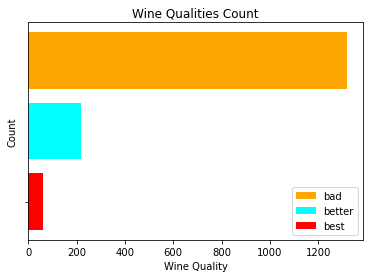

In [8]:
d = dataset['quality'].value_counts()
plt.barh(3,width = d[0],tick_label='',color='orange',label='bad')
plt.barh(2,width = d[1],tick_label='',color='cyan',label='better')
plt.barh(1,width = d[2],tick_label='',color='red',label='best')
plt.title('Wine Qualities Count')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.legend()
plt.show()

## PRERARING THE MODEL FOR PREDICTION

#### Feature Selection

In [9]:
dataset.iloc[:,:-1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [10]:
featureX = np.asarray(dataset.iloc[:,:-1])
featureY = dataset['quality'].values

In [11]:
featureX

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

#### Splitting the data into testing and training dataset

In [12]:
x_train, x_test, y_train, y_test = train_test_split(featureX, featureY, test_size=0.2, random_state=0)

#### Further Splitting the testing data into training ang validation

In [13]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.375, random_state=0)

## TRAINING THE MODEL

In [14]:
classifier_model = RandomForestClassifier(n_estimators=200,random_state=459)
classifier_model.fit(x_train, y_train)
classifier_model.fit(x_validation, y_validation)

RandomForestClassifier(n_estimators=200, random_state=459)

## Predicting the Values

In [15]:
y_predict = classifier_model.predict(x_test)

## Comparing the Test and Predicted Values

In [16]:
review = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
review

,Actual,Predicted
0,good,good
1,good,good
2,best,best
3,good,good
4,good,good
...,...,...
315,good,good
316,bad,good
317,good,good
318,bad,good


## Visualizing the Test - Predict Count

#### Getting the unique value count of the test and predictions

In [17]:
predVal =  pd.DataFrame(y_predict)[0].value_counts()
testVal =  pd.DataFrame(y_test)[0].value_counts()

#### Plotting the Graph

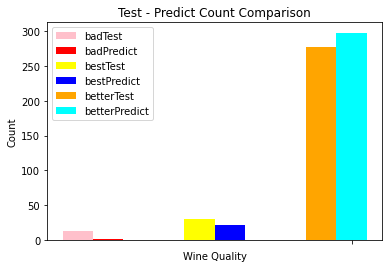

In [22]:
plt.bar(.5,height = testVal[2],width=.25,tick_label='',color='pink',label='badTest')
plt.bar(.75,height = predVal[2],width=.25,tick_label='',color='red',label='badPredict')
plt.bar(1.5,height = testVal[1],width=.25,tick_label='',color='yellow',label='bestTest')
plt.bar(1.75,height = predVal[1],width=.25,tick_label='',color='blue',label='bestPredict')
plt.bar(2.5,height = testVal[0],width=.25,tick_label='',color='orange',label='betterTest')
plt.bar(2.75,height = predVal[0],width=.25,tick_label='',color='cyan',label='betterPredict')
plt.title('Test - Predict Count Comparison')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.legend()
plt.show()

## Accuracy Stats of Model

In [23]:
accuracy = accuracy_score(y_test,y_predict)
print(f'model accuracy = {accuracy}')
print(f'model correctness = {round(accuracy*100,1)}%')

model accuracy = 0.896875
model correctness = 89.7%


## Confusion Matrix

In [24]:
cm = confusion_matrix(y_test, y_predict)
print('CONFUSION MATRIX ::')
print(cm)

CONFUSION MATRIX ::
[[  0   0  13]
 [  0  16  14]
 [  1   5 271]]


## ...............